# 数学期望、方差、矩、协方差和相关系数(Mathematical Expectation、variance、  Moment、  Covariance and correlation coefficient)

## 为什么要研究随机变量的数字特征
----
很多情况下，我们得到的数据不完整或在采集数据的代价过高，我们只能得到一个随机变量的部分信息而无法得到具体的分布函数。这时候，我们想根据有限的数据得出有效的结论就必须利用随机变量的某些数字特征对其局部研究，可以得到整体的认识

常见的数字特征有：
+ 数学期望
+ 方差
+ 矩
+ 协方差和相关系数
+ 中位数
+ 众数等  
(协方差和相关系数三用来表示两个随机变量之间的关系)

## 数学期望
1. 一个随机变量X的数学期望，简称期望，也叫作均值（Mean），记$E(X)$。数学期望与平均值有相类似的方面，简单地说，数学期望就是，可能结果(数据)与可能结果的概率(权重)乘积的**总和**
2. 意义：反映随机变量平均取值的大小(简单理解为：从一组数据中随机抽取一个，可能平均可能取值为$E(X)$   
3. 公式：$E(X) = \displaystyle \sum_{ i = 1 }^{ n } x_i p_i$

例如：一个离散型随机变量X的概率分布律如下：
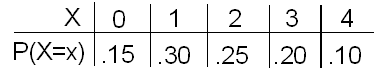

根据定义，可以得出：
$E(X) = \displaystyle \sum_{ i = 1 }^{ n } x_i p_i = 0 \times 0.15 + 1 \times 0.3 + 2 \times 0.25 + 3 \times 0.2 + 4 \times 0.1 = 1.8$


### 数学期望的性质
(a,b,c为常数，X,Y均为随机变量)
1. $E(c) = c $  
2. $E(X+Y) = E(X) + E(Y)$
3. $E(aX+bY+c) = aE(X)+bE(Y)+c$(即：随机变量线性组合的期望等于期望的线性组合。该公式可以推广到任意有限个随机变量线性组合的情况)  
4. 若X，Y**相互独立**，则$E(XY) = E(X)E(Y)$(该公式可以推广到有限多个相互独立的随机变量)

### 数学期望的计算
+ 离散型
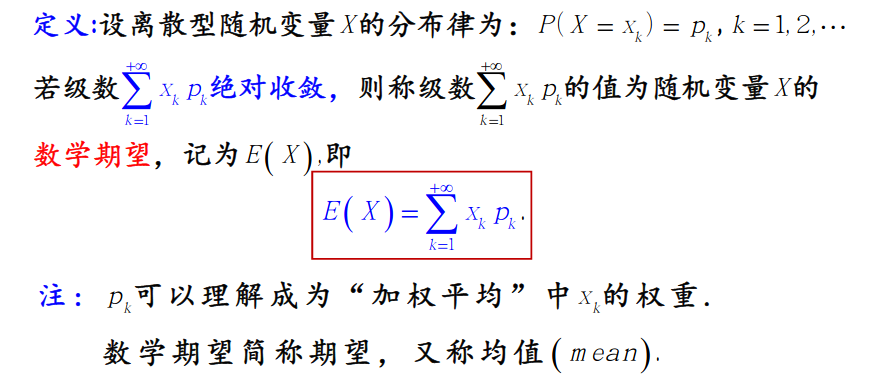
+ 连续型
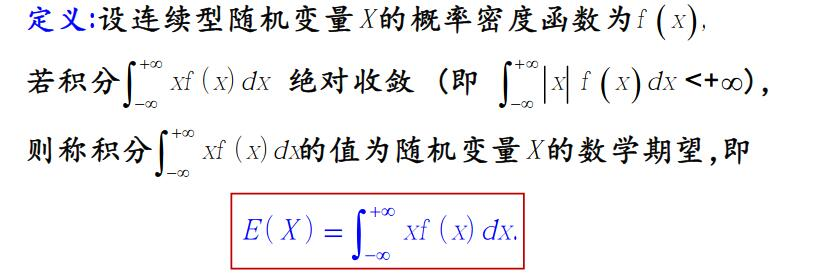


### 常见分布的数学期望
1. 0-1分布，$X \sim B(1,p)$，则$E(X) = p$
2. 二项分布，$X \sim B(1,p)$, 则$E(X) = np$
3. 泊松分布，$X \sim P(\lambda)$, 则$E(x) = \lambda$
4. 几何分布，$X \sim G(p)$, 则$E(x) = 1/p$
5. 均匀分布，$X \sim U(a,b)$, 则$E(x) = \frac{a + b}{2}$
6. 正态分布，$X \sim N(\mu,\sigma^2)$, 则$E(x) = \mu$
7. 指数分布，$X \sim E(\lambda)$, 则$E(x) = \frac{1}{\lambda}$